In [71]:
import SOM
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

# DATASET

In [135]:
#mu = np.random.choice(np.arange(0,20,1),10000)
mu = np.random.uniform(0,20,10000)
b = np.random.uniform(0,2, size = 10000)
x = np.arange(0,5,1)

In [136]:
training_sample = mu[:,None] * x[None,:] +b[:,None]

## DEFINE SOM

In [137]:
nx, ny = 10,10
epochs = 10000

In [138]:
selforgmap = SOM.SOM(x = nx, y = ny, epochs = epochs, vec_size = 5, metric = 'Euclidean',lr0 = 0.01, sigma0 = 5, initialisation = 'RandomNormal')

In [139]:
selforgmap.train(training_sample, samples_epoch = 1)

## TEST SAMPLE

In [140]:
bmu = selforgmap.test_obj(training_sample)

In [141]:
df = pd.DataFrame(np.c_[mu, bmu], columns = ['mu','cell'])

In [142]:
som_vis = df.groupby('cell').mu.median().reset_index().rename(columns = {'mu':'mu_som'})



In [143]:
x_cells = np.arange(0,nx)
y_cells = np.arange(0,ny)
index_cell = np.arange(nx*ny)
cells = np.array(np.meshgrid(x_cells,y_cells)).T.reshape(-1,2)
cells = pd.DataFrame(np.c_[cells[:,0],cells[:,1],index_cell], columns = ['x_cell','y_cell','cell'])

In [144]:
som_data = som_vis.merge(cells, on = 'cell')
som_data = som_data.pivot(index = 'x_cell', columns = 'y_cell', values = 'mu_som')

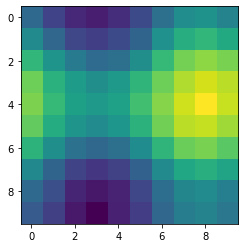

In [145]:
plt.imshow(som_data)